<a href="https://colab.research.google.com/github/borshon2509/Capstone_St1/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ST1/UG Capstone Pragramming Project.

Student Name:Borshon Adhikary

Student ID:u3267515

Data Set:used car price prediction(5)

Work Type:Solo

This Project is based on the used car price data available from Kaggle repository.


(https://github.com/borshon2509/Capstone_St1/blob/main/Capstone.ipynb)

# Importing libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import joblib
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Reading dataset

In [7]:
df = pd.read_csv("/kaggle/train-data.csv")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Key observations from Step 1 about Data Description

* This file contails 6018 used car details from kolkata, chennai and different parts of india.
* There are 14 characteristics and they are listed below
* Name: Represents the make and model of the car.
* Location: Indicates the city where the car is located or listed for sale.
* Year: Specifies the year of manufacture of the car.
* Kilometers Driven: Indicates the total distance the car has been driven.
* Fuel Type: Specifies the type of fuel used by the car (e.g., Petrol, Diesel, CNG, LPG).
* Transmission: Indicates the type of transmission system in the car (e.g., Manual, Automatic).
* Owner Type: Specifies the ownership status of the car (e.g., First owner, Second owner).
* Mileage: Represents the fuel efficiency of the car in terms of kilometers per liter (kmpl) or kilometers per kilogram (km/kg).
* Engine: Specifies the engine capacity of the car in cubic centimeters (CC).
* Power: Indicates the power output of the car's engine in brake horsepower (bhp).
* Seats: Specifies the seating capacity of the car.
* New_Price: Represents the listed price of the car when it was new (if available).
* Price: Represents the current price of the used car in the dataset (target variable for prediction).






Step 2 : Problem Statement Denition


*   Creating a prediction model to predict  the price of cars




# Target variable identification & Visualising the distribution

The histogram visualizes the distribution of prices in the dataset. It's a useful way to understand the spread and concentration of prices within your data

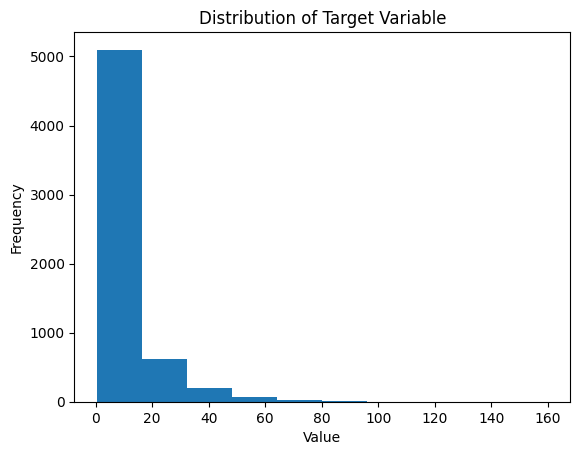

In [8]:
target_variable = 'Price'
plt.hist(df[target_variable])
plt.title('Distribution of Target Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Data exploration

**head() this one helps you to see the first few example of the rows**

In [9]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


**info() this provides the summarized information of the dataset**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


**tail shows the samples of last few rows of the dataset**





In [11]:
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


**df.describe() generates descriptive statistics that summarize the central tendency, dispersion, and shape of the numerical columns in datafram.**

In [12]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


# Identifying and Rejecting useless columns

**df.isna().sum() provides a count of missing values  in each column of  DataFrame df. This can be useful for identifying which columns have missing data and for deciding how to handle them inanalysis or preprocessing**.

In [13]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

This one is mainly used for cleaning up the data frame by removing unneccessary colums and duplicate rows

In [14]:
df.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)
df.duplicated().sum()

0

# Visual Exploratory Data Analysis of data

**This code creates a histogram of the 'Year' column from  DataFrame df using the seaborn library**

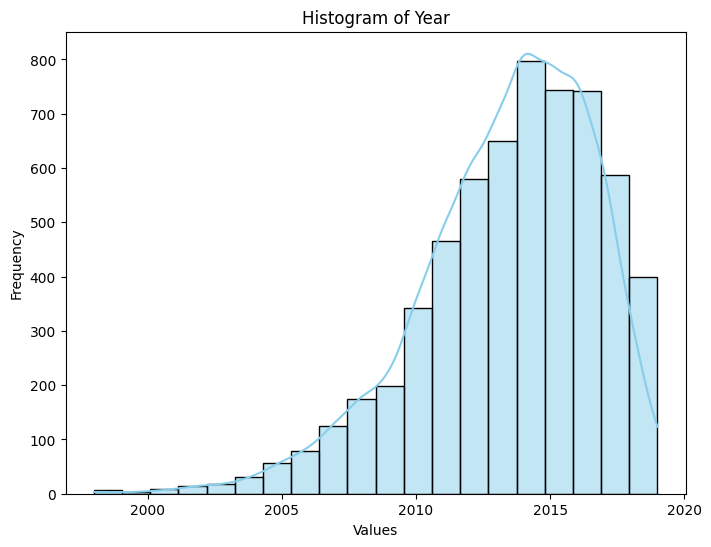

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Year'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Year')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


**This code creates a count plot  of the 'Transmission' column from  DataFrame df using seaborn's countplot() function.**

<ipython-input-16-f1b3cfa822ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Transmission'], palette='Set2')


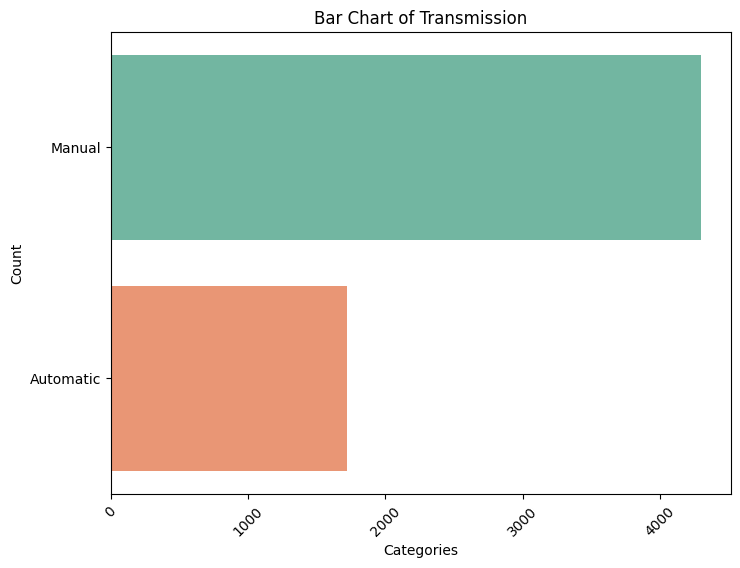

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(df['Transmission'], palette='Set2')
plt.title('Bar Chart of Transmission')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**This code creates a histogram of the 'Owner_Type' column from  DataFrame df using the seaborn library.**

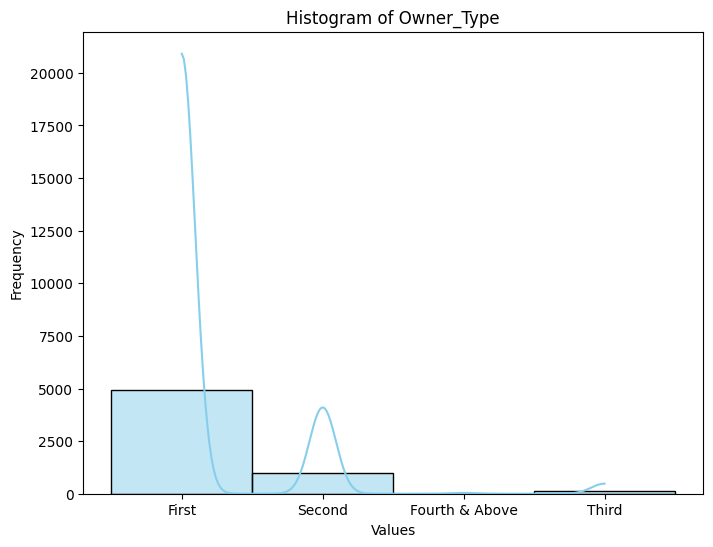

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Owner_Type'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Owner_Type')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

**This histogram provides visual insights into the distribution of years in  dataset and presents key statistical summary information about the 'Year' column**

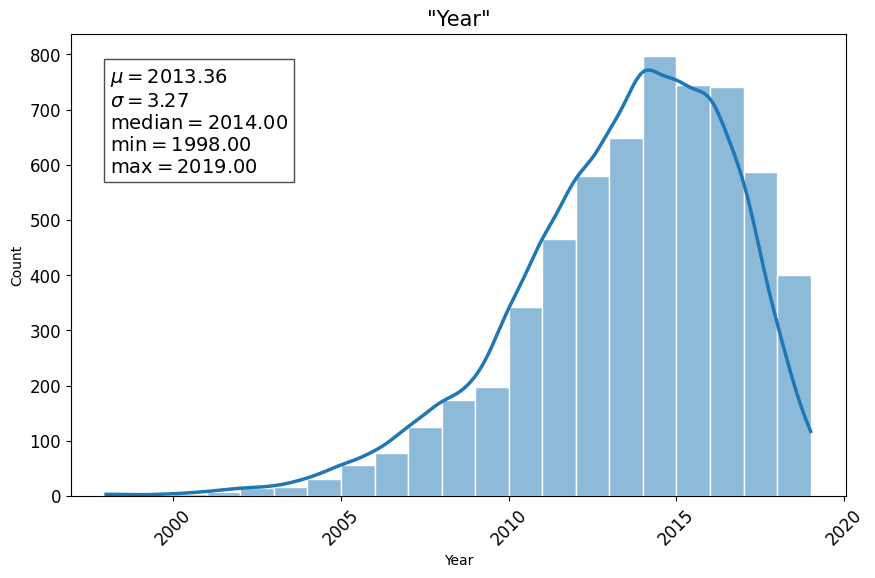

In [18]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Year', bins=21,kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Year"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Year'].mean(),
    r'$\sigma=%.2f$' %df['Year'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Year']),
    r'$\mathrm{min}=%.2f$' %df['Year'].min(),
    r'$\mathrm{max}=%.2f$' %df['Year'].max()
))

plt.text(0.05, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

# Removal of outliers & handling missing values



**This cleaning process prepares  data for further analysis or modeling by ensuring that the values in these columns are numeric.**

In [19]:
df['Mileage'] = df['Mileage'].str.replace('km/kg', '')
df['Mileage'] = df['Mileage'].str.replace('kmpl', '')
df['Engine'] = df['Engine'].str.replace('CC', '')
df['Power'] = df['Power'].str.replace('bhp', '')


# Data Conversion to numeric values

**This function is useful for converting columns to numeric data types (e.g., float) in pandas, which is necessary for performing mathematical operations or numerical analysis.**

In [20]:
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')


**This encoding process converts categorical variables into a format that machine learning algorithms can understand.**

In [21]:
name_encoder = LabelEncoder()
df['Name_encoded'] = name_encoder.fit_transform(df['Name'])
name_mapping = dict(zip(name_encoder.classes_, name_encoder.transform(name_encoder.classes_)))
df.drop(columns=['Name'], inplace=True)


df['Location_encoded'] = name_encoder.fit_transform(df['Location'])
name_mapping = dict(zip(name_encoder.classes_, name_encoder.transform(name_encoder.classes_)))
df.drop(columns=['Location'], inplace=True)

df['Fuel_Type_encoded'] = name_encoder.fit_transform(df['Fuel_Type'])
name_mapping = dict(zip(name_encoder.classes_, name_encoder.transform(name_encoder.classes_)))
df.drop(columns=['Fuel_Type'], inplace=True)

df['Transmission_encoded'] = name_encoder.fit_transform(df['Transmission'])
name_mapping = dict(zip(name_encoder.classes_, name_encoder.transform(name_encoder.classes_)))
df.drop(columns=['Transmission'], inplace=True)

df['Owner_Type_encoded'] = name_encoder.fit_transform(df['Owner_Type'])
name_mapping = dict(zip(name_encoder.classes_, name_encoder.transform(name_encoder.classes_)))
df.drop(columns=['Owner_Type'], inplace=True)
# Display the DataFrame with the new encoded column
print(df.head())

   Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price  \
0  2010              72000    26.60   998.0   58.16    5.0   1.75   
1  2015              41000    19.67  1582.0  126.20    5.0  12.50   
2  2011              46000    18.20  1199.0   88.70    5.0   4.50   
3  2012              87000    20.77  1248.0   88.76    7.0   6.00   
4  2013              40670    15.20  1968.0  140.80    5.0  17.74   

   Name_encoded  Location_encoded  Fuel_Type_encoded  Transmission_encoded  \
0          1200                 9                  0                     1   
1           512                10                  1                     1   
2           486                 2                  4                     1   
3          1059                 2                  1                     1   
4            23                 3                  1                     0   

   Owner_Type_encoded  
0                   0  
1                   0  
2                   0  
3                   

# Handling missing values

 **This process helps to handle missing data by replacing NaN values with the mean of the column.**

In [22]:
column1 = 'Mileage'
column_mean = df['Mileage'].mean()
df['Mileage'] = df['Mileage'].fillna(column_mean)

column2 = 'Engine'
column_mean = df['Engine'].mean()
df['Engine'].fillna(column_mean, inplace=True)

column3 = 'Power'
column_mean = df['Power' ].mean()
df['Power'].fillna(column_mean, inplace=True)

column4 = 'Seats'
column_mean = df['Seats'].mean()
df['Seats'].fillna(column_mean, inplace=True)

**This will provide  the total number of missing values in each column.If all missing values were properly handled through  previous code, there should be zeros across all columns, indicating that there are no missing values left.**

In [23]:
df.isna().sum()

Year                    0
Kilometers_Driven       0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                   0
Name_encoded            0
Location_encoded        0
Fuel_Type_encoded       0
Transmission_encoded    0
Owner_Type_encoded      0
dtype: int64

**By using Z-score identifying values that are unusually far from the mean, which can be considered outliers. Adjusting the threshold allows  to control the sensitivity of outlier detection.**

In [24]:
z_scores = stats.zscore(df["Kilometers_Driven"])
threshold = 2.5
outliers = df['Kilometers_Driven'][abs(z_scores) > threshold]
outliers

340      775000
358      620000
1528     299322
1860     720000
2328    6500000
2823     480000
3092     480000
3649     300000
4491     445000
Name: Kilometers_Driven, dtype: int64

**This operation effectively removes rows where the number of kilometers driven exceeds 300,000 from  DataFrame.**

In [25]:
df = df[df["Kilometers_Driven"] <= 300000]

**This code retrieves the minimum value in the 'Seats' column of DataFrame**

In [26]:
df["Seats"].min()

0.0

**This process allows to identify the most informative features for regression modeling based on mutual information.**

In [27]:
X = df[['Name_encoded', 'Location_encoded', 'Year', 'Kilometers_Driven', 'Fuel_Type_encoded', 'Transmission_encoded', 'Owner_Type_encoded', 'Mileage', 'Engine', 'Power', 'Seats']]
y = df['Price']

selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X, y)
scores = selector.scores_
indices = scores.argsort()[::-1]

top_k = 5
selected_features = X.columns[indices][:top_k]

print("Selected Features:", selected_features)


Selected Features: Index(['Name_encoded', 'Power', 'Engine', 'Mileage', 'Year'], dtype='object')


# Visualize distribution of all the Continuous Predictor variables in the data using histograms

**This will display histograms for the specified columns of kilometers driven,milege,engine and power**

array([[<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Power'}>]], dtype=object)

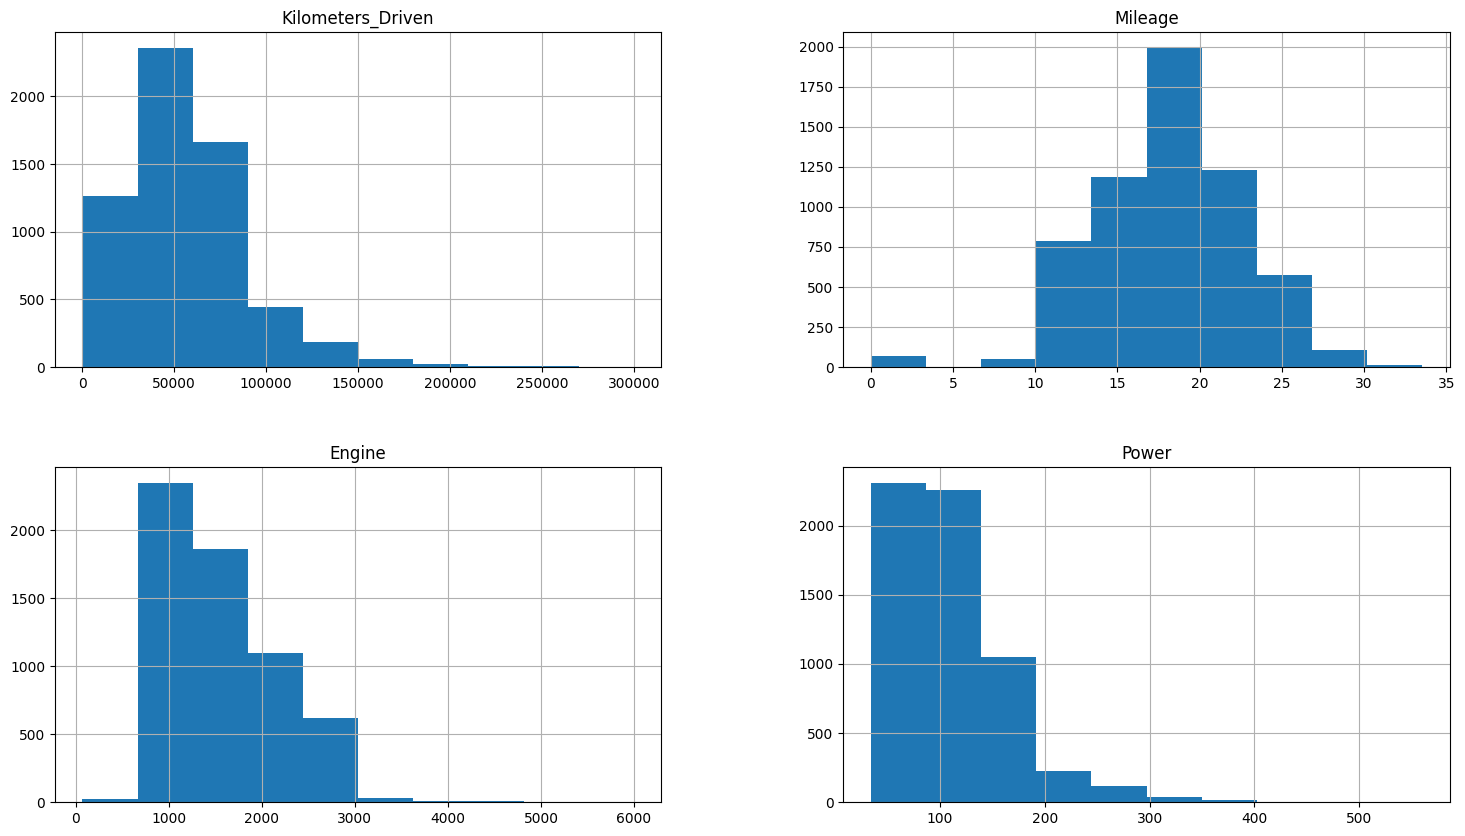

In [28]:
df.hist(['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], figsize=(18,10))

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts

**This will generate scatter plots for each continuous predictor ('Kilometers_Driven', 'Mileage', 'Engine') against the 'Power' column in  DataFrame.**

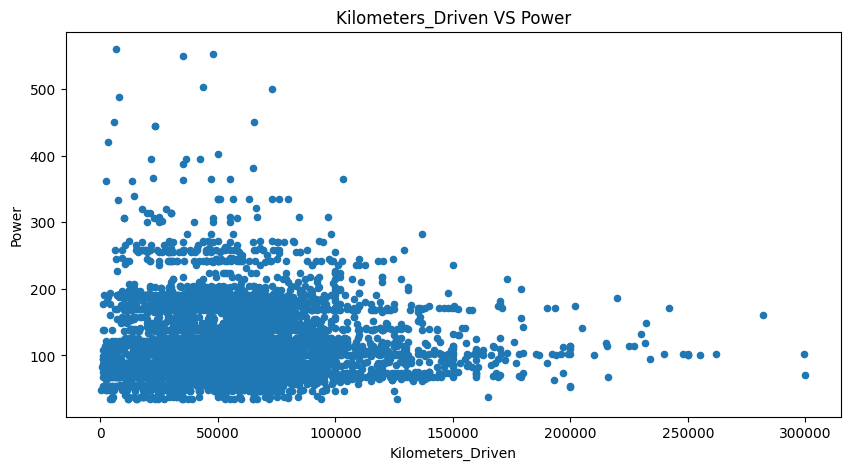

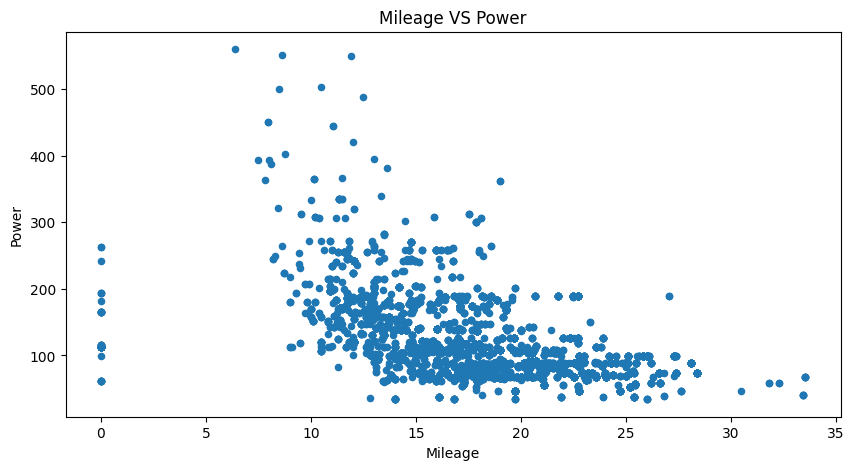

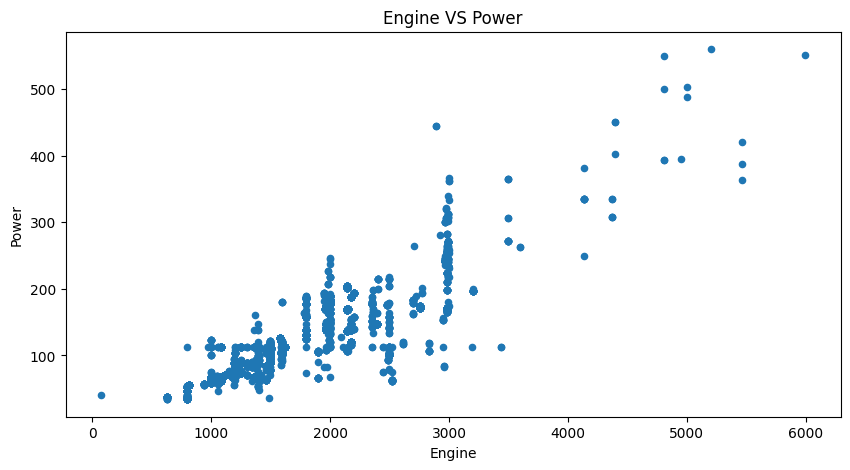

In [39]:
ContinuousCols=['Kilometers_Driven', 'Mileage', 'Engine']

for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='Power', figsize=(10,5), title=predictor+" VS "+ 'Power')

# Visual and Statistic Correlation analysis for selection of best features

**By visualizing the correlation heatmap and printing the correlation coefficients, one can understand the relationship between each feature and the target variable, which can help in feature selection and model building.**

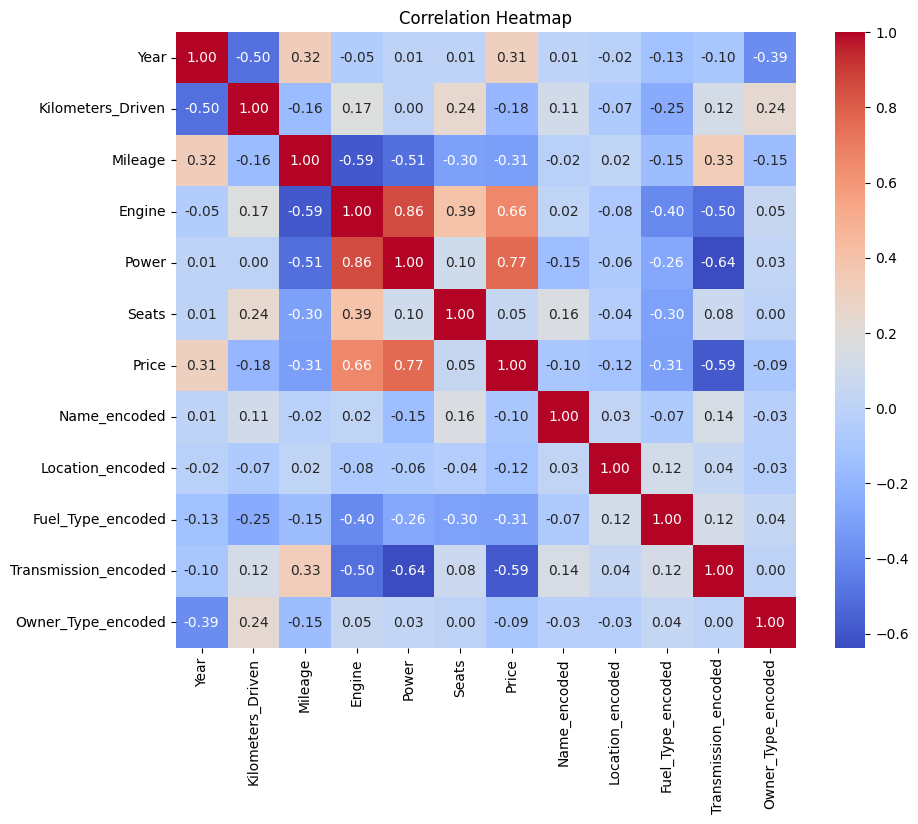

Correlation with the target variable:
Price                   1.000000
Power                   0.767151
Engine                  0.656854
Year                    0.305004
Seats                   0.052424
Owner_Type_encoded     -0.094515
Name_encoded           -0.098812
Location_encoded       -0.116114
Kilometers_Driven      -0.184500
Fuel_Type_encoded      -0.305046
Mileage                -0.306781
Transmission_encoded   -0.586188
Name: Price, dtype: float64


In [45]:

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

target_variable = 'Price'
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

print("Correlation with the target variable:")
print(correlation_with_target)

# Investigating multiple Regression algorithms

**This process allows  to compare the performance of different regression models and select the best-performing one for making predictions.the least mse means the dataset is more accurate**

In [30]:
y = df['Price']
X = df.drop(columns=['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

best_model = None
best_score = 100

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    avg_score = -np.mean(scores)
    print(f"{name} - Average MSE: {avg_score}")

    if avg_score < best_score:
        best_score = avg_score
        best_model = model

print(f"Best Model: {best_model}")

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")


Linear Regression - Average MSE: 37.63416663647915
Ridge Regression - Average MSE: 37.63401253031775
Lasso Regression - Average MSE: 39.467516571918125
Best Model: Ridge()
Mean Squared Error on Test Set: 36.718377421322586


# Deployment of the best model in production

**The model will learn the relationship between the features and the target variable based on the training data. can use it to make predictions on new data or evaluate its performance using appropriate metrics.**

In [31]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

# Applying the model on test dataset

In [48]:
test_data = pd.read_csv('/kaggle/train-data.csv')  # Load your dataset
test_data.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)
test_data.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

**The MSE indicates the average squared difference between the predicted and actual values. Lower values of MSE indicate better model performance.**

In [33]:
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 36.718377421322586


# Data Conversion to numeric values for Test dataset

**By performing these conversions,  ensuring that the 'Mileage', 'Engine', and 'Power' columns in  test_data DataFrame contain numeric values, which may be necessary for further analysis or modeling.**

In [34]:
test_data['Mileage'] = pd.to_numeric(test_data['Mileage'], errors='coerce')
test_data['Engine'] = pd.to_numeric(test_data['Engine'], errors='coerce')
test_data['Power'] = pd.to_numeric(test_data['Power'], errors='coerce')


**This encoding process converts categorical variables into a format that machine learning algorithms can understand.**

In [35]:
name_encoder = LabelEncoder()
test_data['Name_encoded'] = name_encoder.fit_transform(test_data['Name'])
name_mapping = dict(zip(name_encoder.classes_, name_encoder.transform(name_encoder.classes_)))
test_data.drop(columns=['Name'], inplace=True)


test_data['Location_encoded'] = name_encoder.fit_transform(test_data['Location'])
name_mapping = dict(zip(name_encoder.classes_, name_encoder.transform(name_encoder.classes_)))
test_data.drop(columns=['Location'], inplace=True)

test_data['Fuel_Type_encoded'] = name_encoder.fit_transform(test_data['Fuel_Type'])
name_mapping = dict(zip(name_encoder.classes_, name_encoder.transform(name_encoder.classes_)))
test_data.drop(columns=['Fuel_Type'], inplace=True)

test_data['Transmission_encoded'] = name_encoder.fit_transform(test_data['Transmission'])
name_mapping = dict(zip(name_encoder.classes_, name_encoder.transform(name_encoder.classes_)))
test_data.drop(columns=['Transmission'], inplace=True)

test_data['Owner_Type_encoded'] = name_encoder.fit_transform(test_data['Owner_Type'])
name_mapping = dict(zip(name_encoder.classes_, name_encoder.transform(name_encoder.classes_)))
test_data.drop(columns=['Owner_Type'], inplace=True)

print(test_data.head())

   Year  Kilometers_Driven  Mileage  Engine  Power  Seats  Price  \
0  2010              72000      NaN     NaN    NaN    5.0   1.75   
1  2015              41000      NaN     NaN    NaN    5.0  12.50   
2  2011              46000      NaN     NaN    NaN    5.0   4.50   
3  2012              87000      NaN     NaN    NaN    7.0   6.00   
4  2013              40670      NaN     NaN    NaN    5.0  17.74   

   Name_encoded  Location_encoded  Fuel_Type_encoded  Transmission_encoded  \
0          1200                 9                  0                     1   
1           512                10                  1                     1   
2           486                 2                  4                     1   
3          1059                 2                  1                     1   
4            23                 3                  1                     0   

   Owner_Type_encoded  
0                   0  
1                   0  
2                   0  
3                   0  
4 

# Handling the missing values in test dataset

**This process ensures that missing values are handled appropriately in both the training  datasets.**

In [36]:
column1 = 'Mileage'
column_mean = df['Mileage'].mean()
df['Mileage'] = df['Mileage'].fillna(column_mean)

column2 = 'Engine'
column_mean = df['Engine'].mean()
df['Engine'].fillna(column_mean, inplace=True)

column3 = 'Power'
column_mean = df['Power' ].mean()
df['Power'].fillna(column_mean, inplace=True)

column4 = 'Seats'
column_mean = df['Seats'].mean()
df['Seats'].fillna(column_mean, inplace=True)

test_data.isna().sum()

Year                       0
Kilometers_Driven          0
Mileage                 6019
Engine                  6019
Power                   6019
Seats                     42
Price                      0
Name_encoded               0
Location_encoded           0
Fuel_Type_encoded          0
Transmission_encoded       0
Owner_Type_encoded         0
dtype: int64

# Prediction for test data

**This will make predictions using the trained Ridge regression model on the features in test_data and print the predicted values.**

In [38]:
test_data_prediction=ridge_model.predict(X)
print(test_data_prediction)

[-2.0653703  12.63809586  2.97496641 ...  7.94566389  0.44974509
 -0.59728755]
